Day 2 : Neural Network - MNIST

---



In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
import copy
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test_copy = copy.deepcopy(X_test)

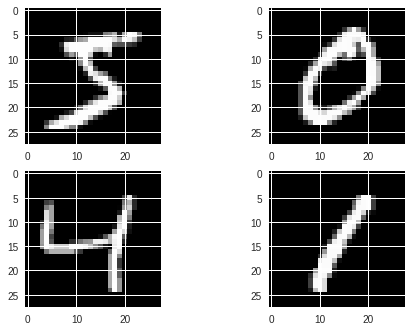

In [23]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [0]:
# Seeding the Random number generator
seed = 42
np.random.seed(seed)

In [25]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)
print(X_train.shape)

784
(60000, 28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [39]:
print(y_train.shape)
print(y_train[0])
print('---------------')
print(X_test.shape)
print(X_train[0][:4])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
---------------
(10000, 784)
[0. 0. 0. 0.]


In [0]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
# Build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2795 - acc: 0.9203 - val_loss: 0.1420 - val_acc: 0.9581
Epoch 2/10
 - 6s - loss: 0.1099 - acc: 0.9686 - val_loss: 0.0944 - val_acc: 0.9714
Epoch 3/10
 - 6s - loss: 0.0718 - acc: 0.9789 - val_loss: 0.0781 - val_acc: 0.9764
Epoch 4/10
 - 6s - loss: 0.0496 - acc: 0.9858 - val_loss: 0.0678 - val_acc: 0.9797
Epoch 5/10
 - 6s - loss: 0.0359 - acc: 0.9899 - val_loss: 0.0648 - val_acc: 0.9799
Epoch 6/10
 - 6s - loss: 0.0263 - acc: 0.9931 - val_loss: 0.0599 - val_acc: 0.9812
Epoch 7/10
 - 6s - loss: 0.0190 - acc: 0.9955 - val_loss: 0.0627 - val_acc: 0.9806
Epoch 8/10
 - 6s - loss: 0.0155 - acc: 0.9961 - val_loss: 0.0572 - val_acc: 0.9815
Epoch 9/10
 - 6s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0578 - val_acc: 0.9818
Epoch 10/10
 - 6s - loss: 0.0076 - acc: 0.9987 - val_loss: 0.0653 - val_acc: 0.9792
Baseline Error: 2.08%


In [32]:
loss,acc = model.evaluate(X_test, y_test, verbose=0)
print(loss,acc)

0.0652977781840891 0.9792


(10000, 784)

In [0]:
predict = np.array(X_test[0])

In [35]:
model.predict(np.array([X_test[0]]).reshape(1,784))

array([[3.8734637e-08, 5.5792902e-11, 9.3296229e-08, 4.0925024e-05,
        2.6023177e-11, 4.0784077e-08, 5.3149531e-13, 9.9994516e-01,
        7.6056750e-08, 1.3713932e-05]], dtype=float32)

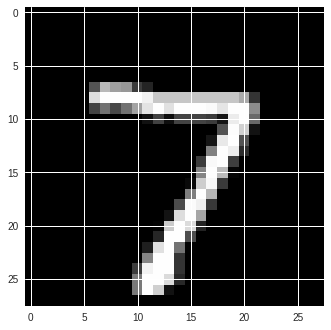

In [36]:
plt.imshow(X_test_copy[0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()